In [1]:
import torch
import numpy as np
import pandas as pd
import random
import torch.nn.functional as F
from torch import nn

In [2]:
from models import *
from utility import *

# Prva naloga

In [3]:
data = pd.read_csv("okuzeni.csv")
data = data.fillna(0)
data

,braslovče,celje,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,...,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,slovenj_gradec,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,46.0,433.0,11.0,38.0,59.0,16.0,83.0,30.0,17.0,60.0,...,104.0,91.0,12.0,200.0,37.0,33.0,58.0,129.0,78.0,149.0
1,50.0,383.0,5.0,32.0,64.0,15.0,76.0,25.0,18.0,58.0,...,104.0,86.0,13.0,192.0,36.0,34.0,69.0,137.0,80.0,142.0
2,54.0,378.0,6.0,31.0,60.0,14.0,80.0,16.0,16.0,60.0,...,100.0,84.0,12.0,198.0,36.0,31.0,87.0,123.0,101.0,148.0
3,51.0,369.0,6.0,27.0,55.0,14.0,79.0,14.0,15.0,53.0,...,97.0,78.0,12.0,192.0,35.0,31.0,86.0,130.0,96.0,134.0
4,52.0,365.0,7.0,27.0,54.0,14.0,83.0,13.0,13.0,51.0,...,100.0,74.0,11.0,188.0,34.0,27.0,89.0,127.0,115.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,16.0,137.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,23.0,46.0,4.0,54.0,15.0,5.0,75.0,113.0,50.0,101.0
796,16.0,134.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,23.0,47.0,4.0,54.0,13.0,5.0,75.0,107.0,49.0,96.0
797,15.0,134.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,19.0,46.0,4.0,54.0,13.0,5.0,75.0,107.0,49.0,94.0
798,17.0,129.0,7.0,7.0,8.0,6.0,39.0,2.0,3.0,10.0,...,18.0,48.0,3.0,49.0,13.0,5.0,79.0,117.0,56.0,101.0


RNN celica

In [4]:
X = torch.tensor(data.to_numpy()).float()
cities_count = int(X.shape[1])
datapoints = int(X.shape[0])

In [18]:
n = 10
batch_size = 16
#device = torch.device("cuda")
# (self, input, output, hidden, layers):
dset = create_dataset(X, batch_size, n)
modelrnn = recurrent(1, 1, 20, n)
criterion = torch.nn.MSELoss() #MSELoss()
optimiser = torch.optim.AdamW(modelrnn.parameters(), lr=0.002, weight_decay=0.005)
epochs = 3

modelrnn = train_recurrent(modelrnn, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 10132.7432, est rea [2.9 34.0]
 Loss: 131184.2188, est rea [4.3 599.0]
 Loss: 91321.1172, est rea [9.6 493.0]
 Loss: 3819.1685, est rea [15.5 12.0]
 Loss: 5177.2769, est rea [16.5 105.0]
 Loss: 25121.5957, est rea [16.7 59.0]
 Loss: 8887.9502, est rea [17.1 17.0]
 Loss: 4682.2993, est rea [17.6 135.0]
 Loss: 15489.2139, est rea [23.9 164.0]
 Loss: 398.5599, est rea [24.1 9.0]
 Loss: 5049.0674, est rea [26.4 16.0]
 Loss: 6145.5977, est rea [29.1 45.0]
 Loss: 1783.0889, est rea [30.1 38.0]
 Loss: 2210.3887, est rea [31.7 23.0]
 Loss: 17691.9941, est rea [32.3 486.0]
 Loss: 12921.0869, est rea [33.7 230.0]
 Loss: 820.7239, est rea [34.1 89.0]
 Loss: 110998.8750, est rea [34.4 48.0]
 Loss: 549.5992, est rea [38.0 89.0]
 Loss: 10669.7637, est rea [38.5 28.0]
 Loss: 10635.4365, est rea [38.6 127.0]
 Loss: 7011.2388, est rea [39.2 188.0]
 Loss: 3142.9141, est rea [40.8 96.0]
 Loss: 3811.6692, est rea [42.2 30.0]
 Loss: 1550.9995, est rea [43.4 5.0]
 Loss: 1576.1423, est rea [5

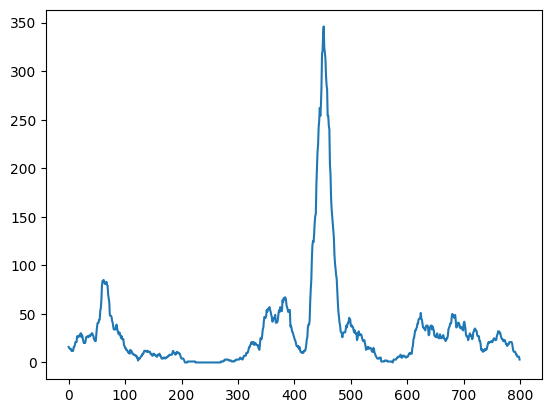

In [6]:
import matplotlib.pyplot as plt
plt.plot(X[:, 5])

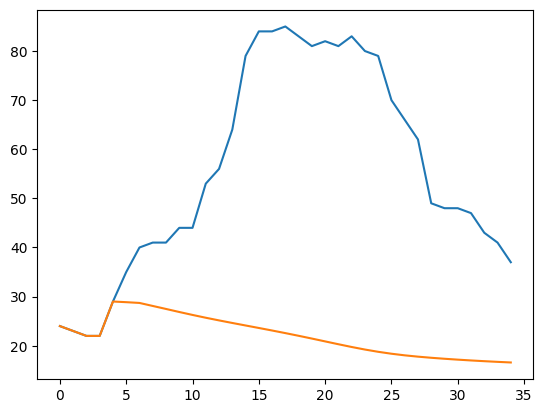

In [7]:
modelrnn.eval()
start = 45
n = 30
mine = predict_n(X, 5, start, modelrnn, n)
plt.plot(X[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

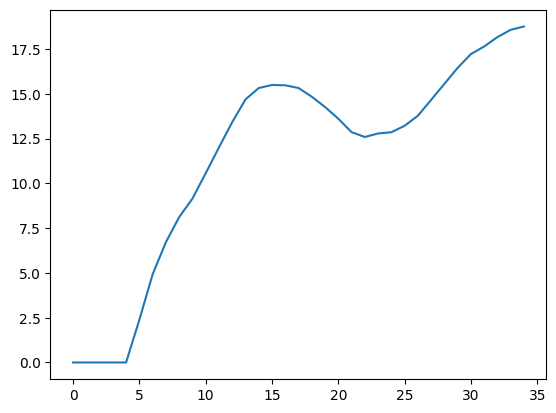

In [8]:
plt.plot(compute_errors(X, modelrnn, range(1,10), 30))

In [19]:
n = 10
batch_size = 16
#device = torch.device("cuda")
# (self, input, output, hidden, layers):
dset = create_dataset(X, batch_size, n)
modellstm = lstm(1, 1, 20, n)
criterion = torch.nn.MSELoss() #MSELoss()
optimiser = torch.optim.AdamW(modellstm.parameters(), lr=0.002, weight_decay=0.005)

modellstm =train_recurrent(modellstm, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 1648.6770, est rea [4.5 3.0]
 Loss: 82043.1094, est rea [5.2 28.0]
 Loss: 3077.1497, est rea [8.1 27.0]
 Loss: 5867.3389, est rea [8.7 27.0]
 Loss: 134.7582, est rea [10.3 28.0]
 Loss: 62344.3711, est rea [12.8 122.0]
 Loss: 14211.2666, est rea [14.1 75.0]
 Loss: 3174.0608, est rea [15.9 19.0]
 Loss: 547310.9375, est rea [24.6 569.0]
 Loss: 1871.8901, est rea [25.0 15.0]
 Loss: 19964.3691, est rea [26.9 157.0]
 Loss: 1363.1417, est rea [26.9 100.0]
 Loss: 1290.3752, est rea [28.6 46.0]
 Loss: 46420.1289, est rea [28.6 106.0]
 Loss: 173694.6719, est rea [30.0 200.0]
 Loss: 1072.0245, est rea [30.1 12.0]
 Loss: 5120.0405, est rea [30.1 31.0]
 Loss: 5369.3521, est rea [32.4 19.0]
 Loss: 1014.1768, est rea [33.7 32.0]
 Loss: 30911.9062, est rea [36.9 29.0]
 Loss: 1147.3242, est rea [38.1 13.0]
 Loss: 26149.4336, est rea [40.4 78.0]
 Loss: 656418.6250, est rea [42.6 648.0]
 Loss: 1539.4937, est rea [46.8 4.0]
 Loss: 30125.3926, est rea [47.6 80.0]
 Loss: 24144.5352, est rea 

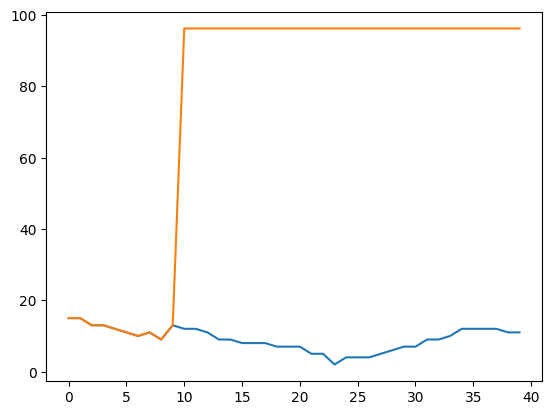

In [20]:
modellstm.eval()
start = 100
n = 30
mine = predict_n(X, 5, start, modelrnn, n)
plt.plot(X[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

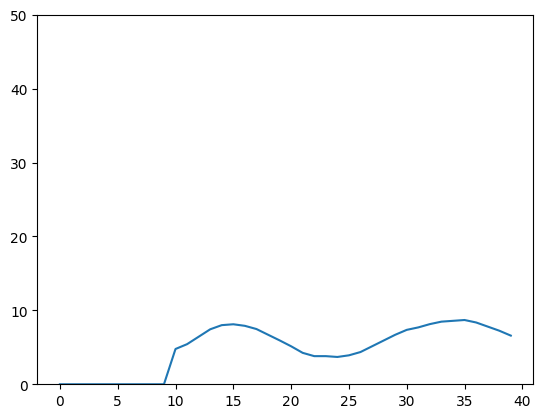

In [21]:
plt.gca().set_ylim([0,50])
plt.plot(compute_errors(X, modellstm, range(1,10), 30))

In [23]:
n = 10
batch_size = 16
#device = torch.device("cuda")
# (self, input, output, hidden, layers):
dset = create_dataset(X, batch_size, n)
modeldeep = deep_linear(1,1,20, n)
criterion = torch.nn.MSELoss() 
optimiser = torch.optim.AdamW(modeldeep.parameters(), lr=0.002, weight_decay=0.005)

epochs = 3
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)

Epoch  0


RuntimeError: shape '[5, 16]' is invalid for input of size 160

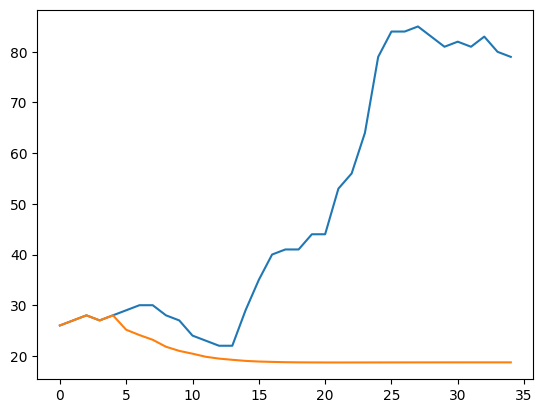

In [ ]:
modeldeep.eval()
start = 35
n = 30
mine = predict_n_deep(X, 5, start, modeldeep, n)
plt.plot(X[start:start+n+modeldeep.layers, 5])
plt.plot(mine)

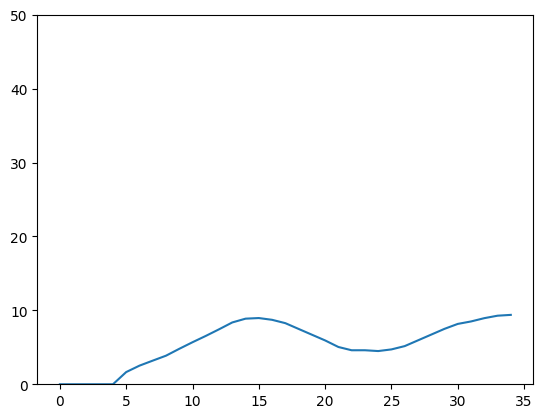

In [ ]:
plt.gca().set_ylim([0,50])
plt.plot(compute_errors_deep(X, modeldeep, range(1,10), 30))